<a href="https://colab.research.google.com/github/gcfcmu/Projects/blob/main/grad_project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scanpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import scanpy

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#data = scanpy.read_mtx("/content/drive/MyDrive/matrix.mtx")

In [ ]:
import pandas

In [ ]:
#cluster = scanpy.read_csv("/content/drive/MyDrive/GEB/cluster_file.csv")

In [ ]:
import anndata

In [ ]:
#genes = pandas.read_csv("/content/drive/MyDrive/GEB/genes.tsv", sep = "\t", header = None)
import os
os.getcwd()

'/Users/gabrielf/Downloads'

In [ ]:
data2 = scanpy.read_10x_mtx("GEB/", gex_only = False)

In [ ]:
meta = pandas.read_csv("GEB/metadata.csv")

l = []
for i in range(0,len(meta["cell_type__ontology_label"])):
    l.append(meta["cell_type__ontology_label"][i])
    
    
data2.obs["cell"] = l

In [ ]:
scanpy.pp.neighbors(data2)

scanpy.tl.umap(data2)

         Falling back to preprocessing with `sc.pp.pca` and default params.


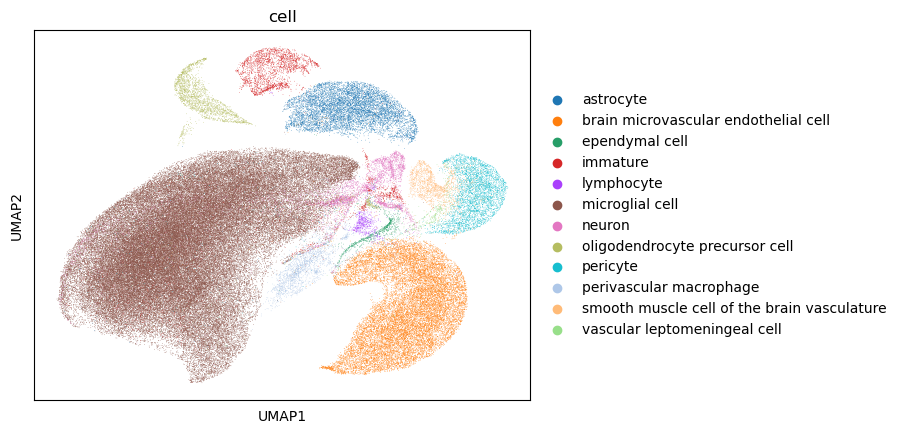

In [ ]:

scanpy.pl.umap(data2, color = "cell")


In [ ]:
#scanpy.tl.rank_genes_groups(data2, groupby="cell", method="t-test")

In [ ]:
scanpy.tl.rank_genes_groups(data2,groupby="cell",method="logreg")

/Users/gabrielf/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
result = data2.uns["rank_genes_groups"]

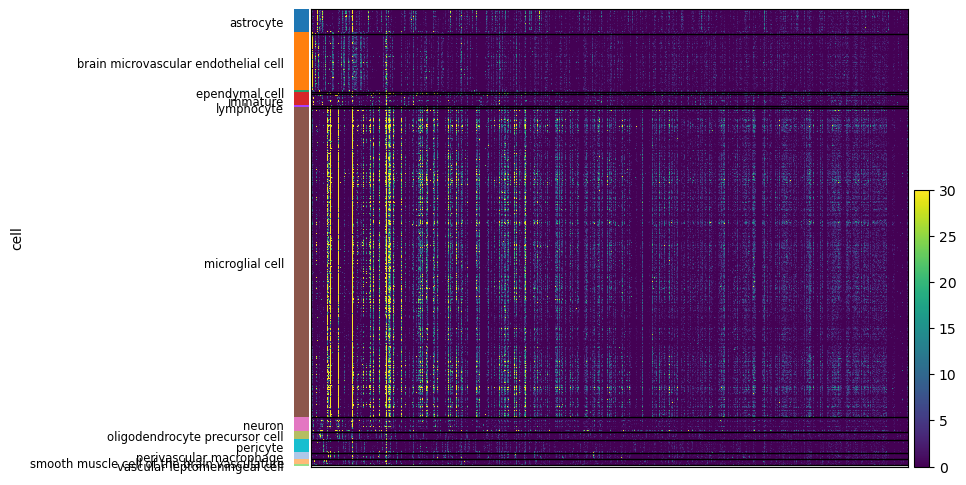

In [ ]:
scanpy.pl.heatmap(data2, var_names = data2.var_names, groupby="cell", vmax = 30.0)

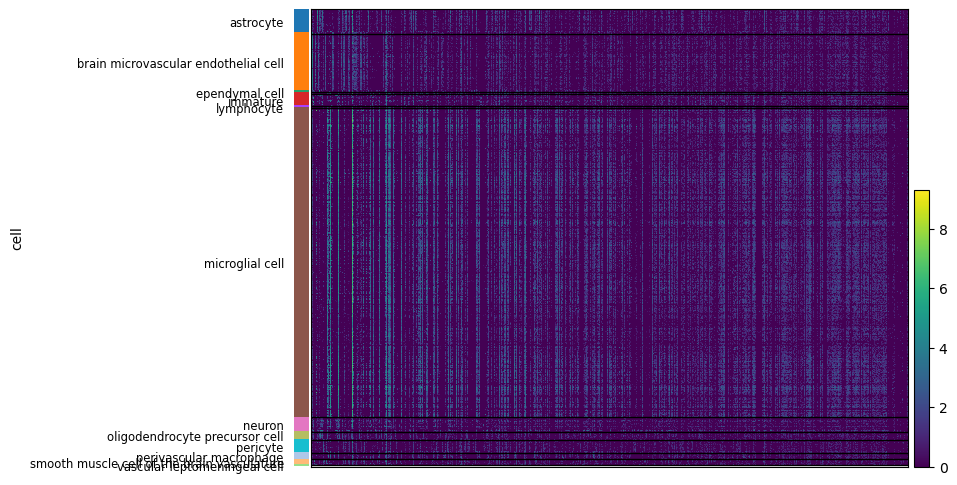

In [ ]:
scanpy.pl.heatmap(data2, var_names = data2.var_names, groupby="cell", log=True)

In [ ]:
display(data2.obsm["X_pca"])

array([[ 1.1380482e+02, -2.0313995e+02, -3.1184568e+01, ...,
         7.4052529e+00, -1.3105872e+01,  1.8915382e+01],
       [-3.7484988e+02,  6.7359985e+01,  1.9809253e+02, ...,
         2.3500838e+00,  2.5334229e+00,  5.9308639e+00],
       [-7.4797745e+01, -9.7426529e+01, -7.0811302e+01, ...,
         1.9313495e+00, -3.8163822e+00, -8.6741433e-02],
       ...,
       [ 1.7562944e+02, -2.1123788e+02,  3.9878521e+01, ...,
        -1.3113861e+01,  2.6347106e+00,  1.0706365e+01],
       [-2.0901436e+02,  1.8875434e+00, -7.5622375e+01, ...,
         6.8709689e-01,  2.0328732e+00, -5.3014046e-01],
       [ 4.1030725e+02,  4.9333701e+00, -3.6383678e+01, ...,
        -4.7010956e+00,  1.4171962e-02,  3.5491322e+01]], dtype=float32)

In [ ]:
scanpy.tl.dendrogram(data2, groupby="cell")

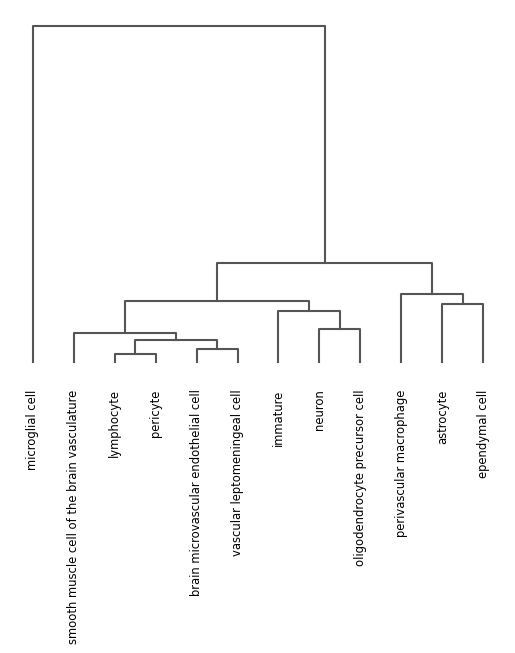

<AxesSubplot:>

In [ ]:
scanpy.pl.dendrogram(data2, groupby="cell")

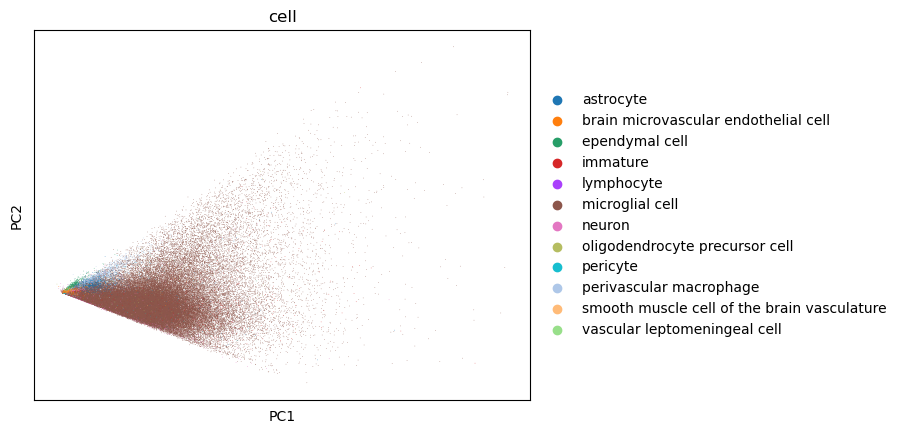

In [ ]:
scanpy.pl.pca(data2, color="cell")

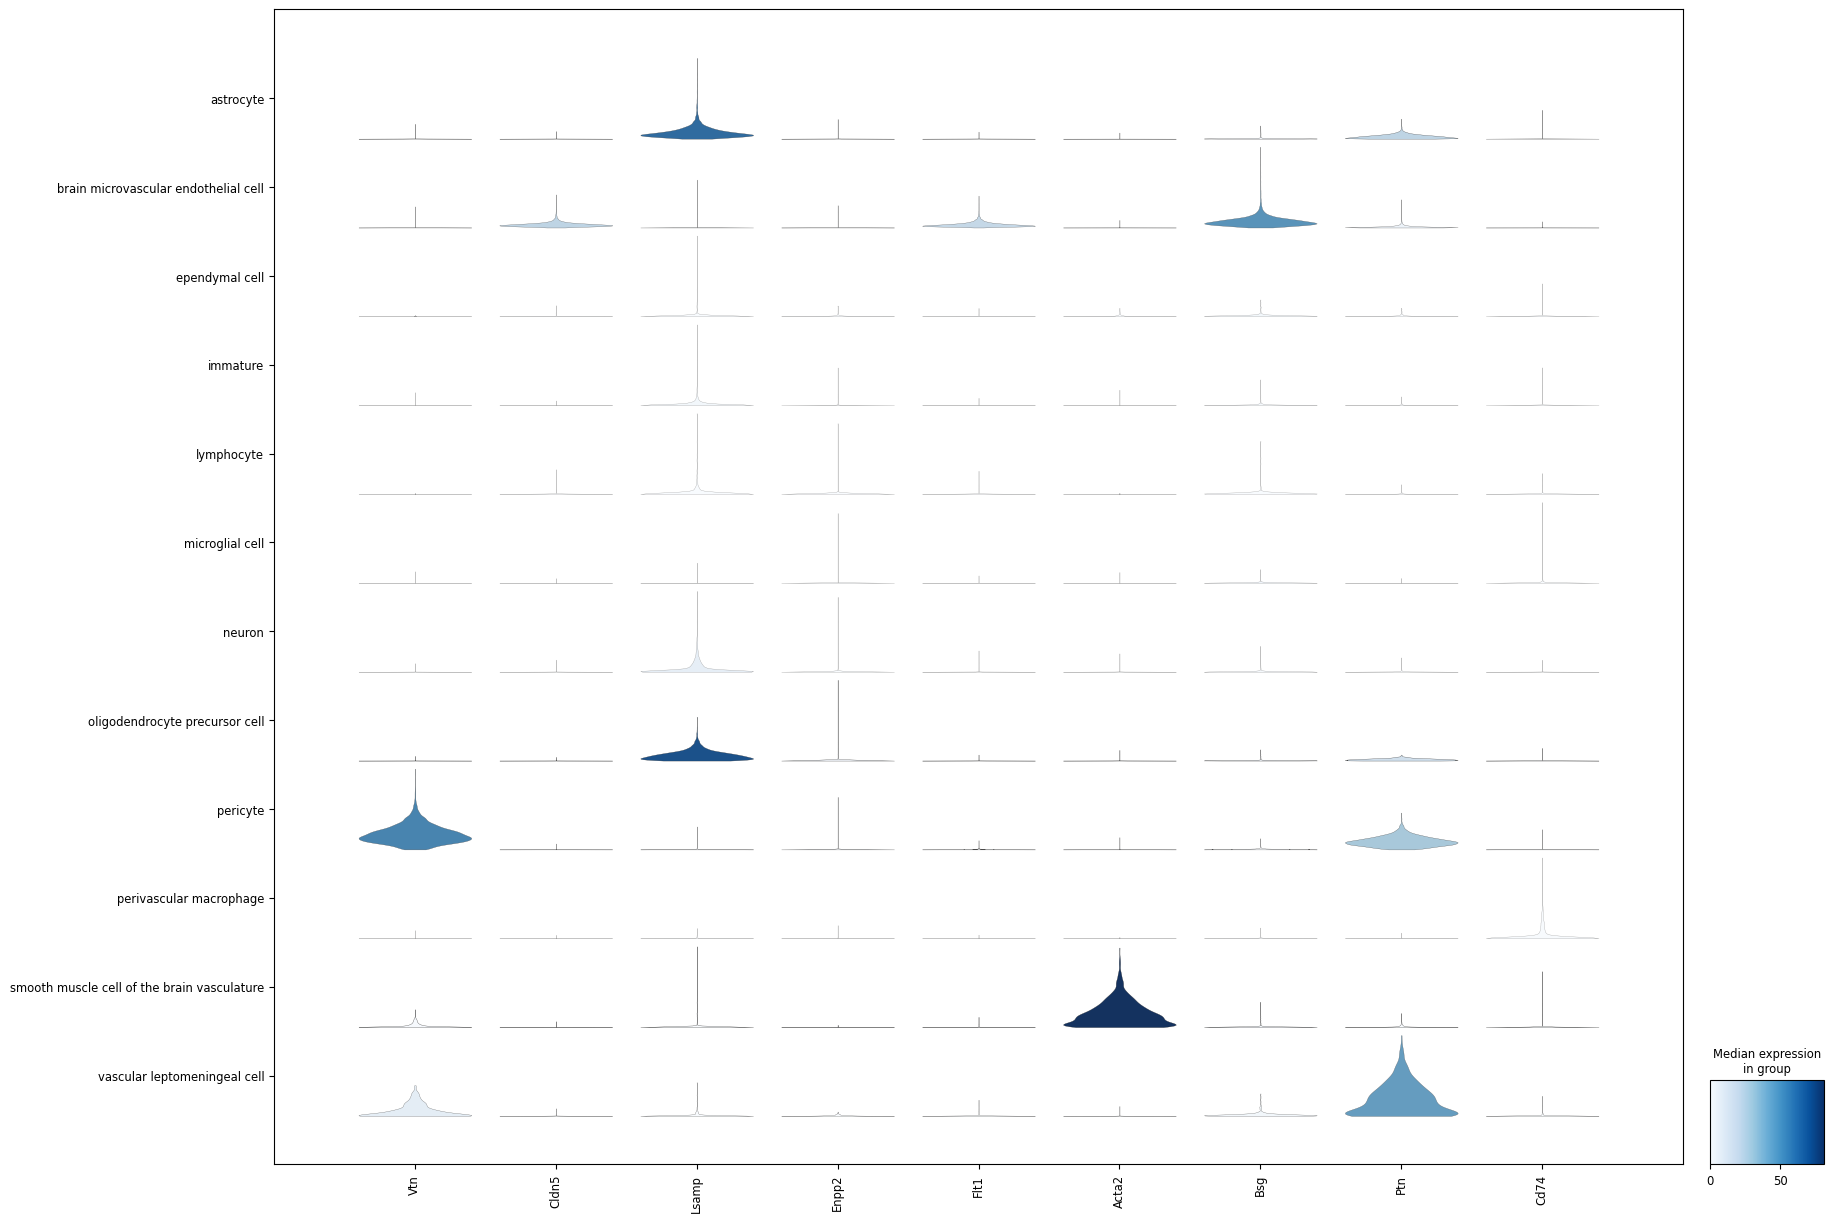

In [ ]:
scanpy.pl.stacked_violin(data2, var_names = data2.var_names[1:10],  groupby = "cell", figsize=(20,15))

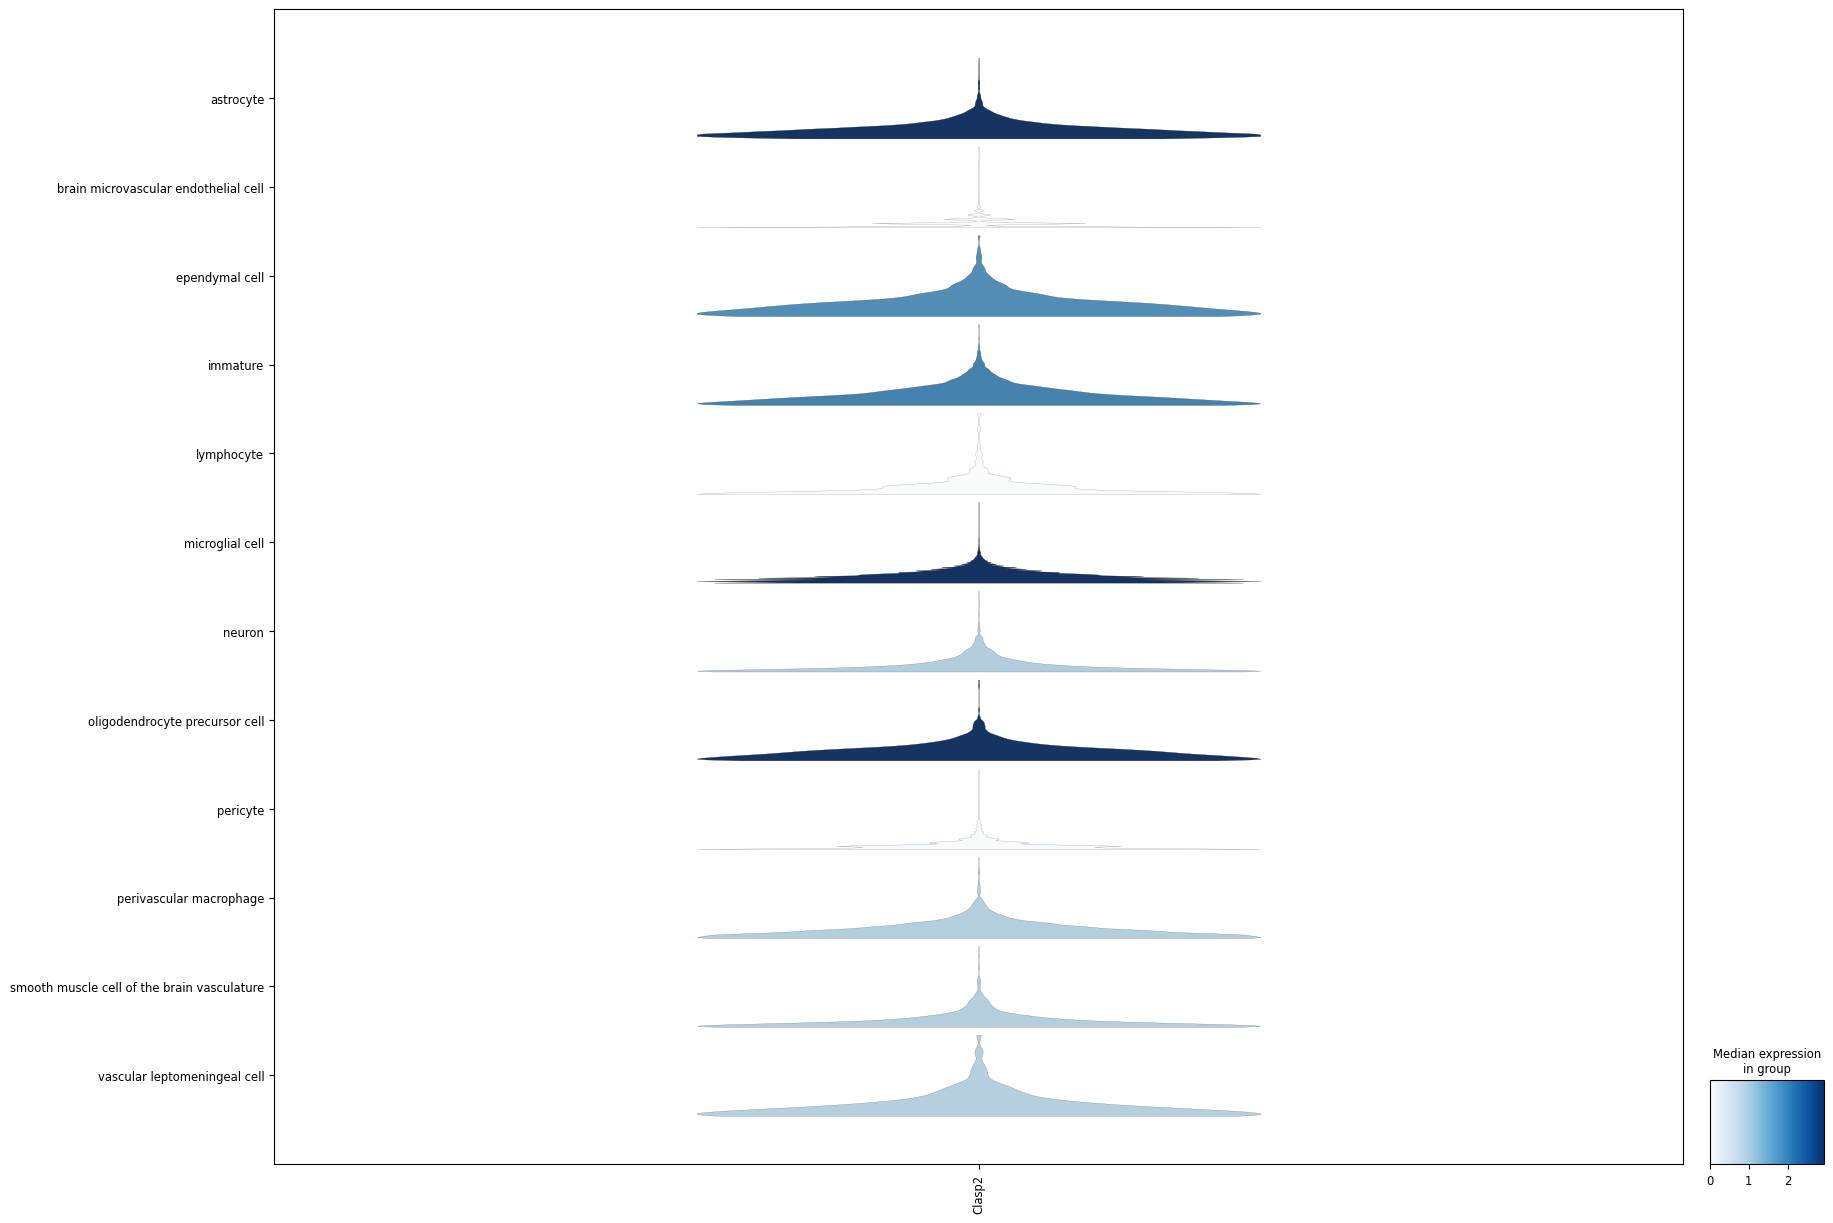

In [ ]:
scanpy.pl.stacked_violin(data2, var_names = "Clasp2",  groupby = "cell", figsize=(20,15))

In [ ]:
scanpy.tl.rank_genes_groups(data2 ,groupby="cell", method="wilcoxon")